##### Enable lib imports

In [1]:
import os
import sys

notebook_dir = os.getcwd()

project_root = os.path.dirname(notebook_dir)
if project_root not in sys.path:
    sys.path.append(project_root)

##### Setup Optimization Problem

In [2]:
def f(x):
    x1, x2, x3 = x
    return x1 ** 2 + x2 ** 2 + x3 ** 2


design_variables = [
    {'name': 'x', 'lower_bound': -200, 'upper_bound': 200, 'bits': 12},
    {'name': 'y', 'lower_bound': -200, 'upper_bound': 200, 'bits': 12},
    {'name': 'z', 'lower_bound': -200, 'upper_bound': 200, 'bits': 12}
]

evolution_strategy = {
    'num_of_generations': 300,
    'population_size': 120,
    'elitism_rate': 0.2,
    'crossover_elitism_rate': 0.5,
    'mutation_rate': 0.05
}

##### Run Classical Genetic Algorithm

In [3]:
from lib.classical_genetic_algorithm import ClassicalGeneticAlgorithm


cga = ClassicalGeneticAlgorithm()
cga.set_evolution_strategy(evolution_strategy)
cga.set_design_variables(design_variables)
cga.set_fitness_function(f)

cga.initialize_generation()
cga.evolve()

##### Print solution

In [4]:
optimal_individual = cga.get_optimal_individual()
print(f'Optimal Individual: {optimal_individual.decode()}')
print(f'Optimal Fitness: {optimal_individual.fitness_score}')

Optimal Individual: [0.04884004884004867, -0.04884004884004867, -0.04884004884004867]
Optimal Fitness: 0.007156051112095017


##### Plot convergence

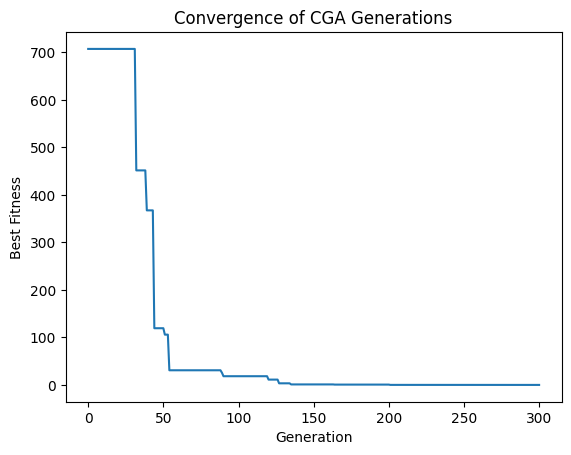

In [5]:
cga.plot_convergence()